In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('/content/Halloween_candy.xlsx')
df.head()

,ID,Q1: going out?,Q2: gender,Q3: age,Q4: country,Q5: state/province,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: joy other,Q8: despair other,Q9: other comments,Q10: dress,Q11: day
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,Sunday
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,"Reese's crispy crunchy bars, 5th avenue bars, ...",NaN,Raisins can go to hell,White and gold,Sunday
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,JOY,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN,NaN,White and gold,Friday


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 114 entries, ID to Q11: day
dtypes: int64(1), object(113)
memory usage: 2.1+ MB


In [4]:
df.shape

(2460, 114)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df['ID'].duplicated().sum()

np.int64(0)

In [7]:
columns= [col for col in df.columns if col != 'ID']

len(df[df[columns].isna().all(axis=1) & df['ID'].notna()])

21

In [8]:
df=df.drop(df[df[columns].isna().all(axis=1) & df['ID'].notna()].index)

In [9]:
df.shape

(2439, 114)

In [10]:
df=df.drop(columns=['ID'])

In [11]:
df.duplicated().sum()

np.int64(18)

In [12]:
df=df.drop_duplicates()

In [13]:
df.shape

(2421, 113)

In [14]:
df['Q1: going out?'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [15]:
df['Q1: going out?'].dtype

dtype('O')

In [16]:
df['Q1: going out?'].isnull().sum()

np.int64(89)

In [17]:
df['Q1: going out?'].value_counts()

,count
Q1: going out?,
No,2020
Yes,312


In [18]:
df['Q1: going out?'].replace(np.nan,'Unknown',inplace=True)

/tmp/ipython-input-18-2642988228.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Q1: going out?'].replace(np.nan,'Unknown',inplace=True)


In [19]:
df['Q1: going out?'].value_counts()

,count
Q1: going out?,
No,2020
Yes,312
Unknown,89


In [20]:
df['Q2: gender'].value_counts()

,count
Q2: gender,
Male,1457
Female,836
I'd rather not say,81
Other,30


In [21]:
df['Q2: gender'].isnull().sum()

np.int64(17)

In [22]:
df['Q2: gender'].replace(np.nan,"I'd rather not say",inplace=True)

/tmp/ipython-input-22-2565006767.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Q2: gender'].replace(np.nan,"I'd rather not say",inplace=True)


In [23]:
df['Q2: gender'].value_counts()

,count
Q2: gender,
Male,1457
Female,836
I'd rather not say,98
Other,30


In [24]:
df['Q2: gender'].replace('Other',"I'd rather not say",inplace=True)

/tmp/ipython-input-24-2551116041.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Q2: gender'].replace('Other',"I'd rather not say",inplace=True)


In [25]:
df['Q2: gender'].value_counts()

,count
Q2: gender,
Male,1457
Female,836
I'd rather not say,128


In [26]:
df['Q3: age'].isnull().sum()

np.int64(54)

In [27]:
df['Q3: age'].dtype

dtype('O')

In [28]:
df['Q3: age'].value_counts()

,count
Q3: age,
40,92
34,90
37,89
43,86
36,79
...,...
59 on the day after Halloween,1
old enough,1
your mom,1


In [29]:
df['Q3: age'].unique()

array([44, 49, 40, 23, nan, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42,
       62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19,
       'Old enough', 57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9,
       68, 20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88,
       '39.4', 74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       '70 1/2', 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [30]:
def clean_age(age):
    if pd.isna(age):
        return np.nan
    age = str(age).strip().lower()
    words = age.split()
    for word in words:
        if word.isdigit():
            return int(word)
        else:
            return np.nan
    if age == "60+":
        return 60
    elif age in ["old enough", "Enough"]:
        return np.nan
    elif '-' in age:
        numbers = [int(x) for x in age.split('-') if x.isdigit()]
        if len(numbers) == 2:
            return (numbers[0] + numbers[1]) // 2
    else:
        return np.nan

In [31]:
df['Q3: age'] = df['Q3: age'].apply(clean_age)

In [32]:
df['Q3: age'] = pd.to_numeric(df['Q3: age'], errors='coerce')

In [33]:
df['Q3: age'].unique()

array([  44.,   49.,   40.,   23.,   nan,   53.,   33.,   43.,   56.,
         64.,   37.,   59.,   48.,   54.,   36.,   45.,   25.,   34.,
         35.,   38.,   58.,   50.,   47.,   16.,   52.,   63.,   65.,
         41.,   27.,   31.,   61.,   46.,   42.,   62.,   29.,   39.,
         32.,   28.,   69.,   67.,   30.,   22.,   26.,   51.,   70.,
         24.,   18.,   19.,   57.,   60.,   66.,   12.,   55.,   72.,
         21.,   11.,    9.,   68.,   20.,    6.,   10.,   71.,   90.,
         13.,  312.,   99.,    7.,   88.,   74.,  102.,   17.,   15.,
          8.,   75.,   14.,  100.,   76., 1000.,   77.,   73.,    1.,
          4.])

In [34]:
df['Q3: age'].isnull().sum()

np.int64(77)

In [35]:
df['Q3: age']=df['Q3: age'].apply(lambda x: np.nan if x>90 else x).astype('Int64')
df['Q3: age'].unique()

<IntegerArray>
[  44,   49,   40,   23, <NA>,   53,   33,   43,   56,   64,   37,   59,   48,
   54,   36,   45,   25,   34,   35,   38,   58,   50,   47,   16,   52,   63,
   65,   41,   27,   31,   61,   46,   42,   62,   29,   39,   32,   28,   69,
   67,   30,   22,   26,   51,   70,   24,   18,   19,   57,   60,   66,   12,
   55,   72,   21,   11,    9,   68,   20,    6,   10,   71,   90,   13,    7,
   88,   74,   17,   15,    8,   75,   14,   76,   77,   73,    1,    4]
Length: 77, dtype: Int64

In [36]:
df['Q3: age'].isnull().sum()

np.int64(83)

In [37]:
df['Q4: country'].unique()

array(['USA', 'us', 'usa', nan, 'canada', 'Canada', 'Us', 'US', 'Murica',
       'United States', 'uk', 'United Kingdom', 'united states', 'Usa',
       'United staes', 'United States of America', 'UAE', 'England', 'UK',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35,
       'france', 'U.S.A.', 'finland', 'unhinged states',
       'united states of america', 'US of A', 'Unites States',
       'The United States', 'North Carolina', 'Unied States',
       'Netherlands', 'germany', 'Europe', 'Earth', 'U S', 'u.s.', 'U.K.',
       'Costa Rica', 'The United States of America', 'unite states',
       'U.S.', 46, 'cascadia', 'Australia', 'insanity lately', 'Greece',
       'USA? Hard to tell anymore..', 'merica', 'usas', 'Pittsburgh', 45,
       'United State', 32, 'France', 'australia', 'A', 'Can', 'Canae',
       'New York', 'Trumpistan', 'Ireland', 'United Sates', 'Korea',
       'California', 'Japan', 'USa', 'South africa',
       'I pretend to be from Canada, but 

In [38]:
country_mapping = {
    'usa': 'United States', 'us': 'United States', 'united states': 'United States',
    'murica': 'United States', 'u.s.': 'United States', 'united states of america': 'United States',
    'unites states': 'United States', 'united staes': 'United States', 'u s': 'United States',
    'america': 'United States', 'us of a': 'United States', 'u.s.a': 'United States',
    'canada': 'Canada', 'canada ': 'Canada',
    'france': 'France', 'franc': 'France',
    'germany': 'Germany', 'germ': 'Germany',
    'uk': 'United Kingdom', 'united kingdom': 'United Kingdom', 'england': 'United Kingdom',
    'britain': 'United Kingdom', 'u.k.': 'United Kingdom',
    'australia': 'Australia', 'austral': 'Australia',
    'mexico': 'Mexico',
    'italy': 'Italy',
    'japan': 'Japan',
    'korea': 'South Korea', 'south korea': 'South Korea',
    'switzerland': 'Switzerland', 'swiss': 'Switzerland',
    'denmark': 'Denmark',
    'sweden': 'Sweden',
    'finland': 'Finland',
    'netherlands': 'Netherlands', 'holland': 'Netherlands',
    'belgium': 'Belgium',
    'austria': 'Austria',
    'norway': 'Norway',
    'spain': 'Spain',
    'singapore': 'Singapore',
    'hong kong': 'Hong Kong',
    'new york': 'United States', 'california': 'United States', 'new jersey': 'United States',
    'pittsburgh': 'United States', 'trumpistan': 'United States', 'cascadia': 'United States',
}

In [39]:
df['Q4: country'] = df['Q4: country'].apply(
    lambda x: country_mapping.get(str(x).strip().lower() if pd.notna(x) else np.nan, np.nan)
)

In [40]:
df['Q4: country'].unique()

array(['United States', nan, 'Canada', 'United Kingdom', 'Mexico',
       'France', 'Finland', 'Netherlands', 'Germany', 'Australia',
       'South Korea', 'Japan', 'Denmark', 'Switzerland', 'Singapore',
       'Hong Kong', 'Spain', 'Sweden'], dtype=object)

In [41]:
df['Q4: country'].isnull().sum()

np.int64(111)

In [42]:
df['Q4: country'].replace(np.nan,'Unknown',inplace=True)

/tmp/ipython-input-42-3294763023.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Q4: country'].replace(np.nan,'Unknown',inplace=True)


In [43]:
df['Q4: country'].unique()

array(['United States', 'Unknown', 'Canada', 'United Kingdom', 'Mexico',
       'France', 'Finland', 'Netherlands', 'Germany', 'Australia',
       'South Korea', 'Japan', 'Denmark', 'Switzerland', 'Singapore',
       'Hong Kong', 'Spain', 'Sweden'], dtype=object)

In [44]:
df['Q5: state/province'].unique()

array(['NM', 'Virginia', 'or', 'exton pa', nan, 'Colorado', 'ontario',
       'Ontario', 'Wa', 'Quebec', 'NY', 'California', 'Texas', 'NEW YORK',
       'CO', 'IN', 'MN', 'aberdeenshire', 'Alberta', 'Wisconsin, 53705',
       'RI', 'NC', 'Scotland', 'minnesota', 'Michigan', 'Florida',
       'New Jersey', 'VA', 'Los Angeles, California', 'CA', 'New York',
       'Chicago, Illinois', 'Nj', 'Wisconsin', 'Minnesota', 'London',
       'mn', 'TEXAS', 'Illinois', 'District of Columbia', 'Washington',
       'Massachusetts', 'OR', 'Montana', 'massachusetts', 'Abu Dhabi',
       'TX', 'Arizona', 'Dc', 'yukon', 'Pennsylvania', 'MD', 'Ohio',
       'OXFORDSHIRE', 'DC', 'Iowa', 'Mn', 'TN', 'BC', 'Maryland', 'MI',
       'alaska', 'Ny', 'Colorado, Jefferson county ', 'Louisiana', 'pa',
       'CO, Larimer County', 'Nebraska', 'Oregon', 'UT', 'ny', 'CDMX',
       'north carolina', 'Tennessee', 'Knox county, Tennessee',
       'New Mexico', 'Maine', 'maine', 'Virginia, Arlington', 'WA', 'MO',
      

In [45]:
state_province_mapping = {
    # California
    'california': 'California', 'ca': 'California', 'cali': 'California',
    'los angeles': 'California', 'oakland': 'California', 'gloucester': 'California',
    'san diego': 'California', 'ventura': 'California', 'queens': 'California',
    # New York
    'new york': 'New York', 'ny': 'New York', 'brooklyn': 'New York',
    'dutchess county': 'New York', 'ulster county': 'New York',
    # Texas
    'texas': 'Texas', 'tx': 'Texas',
    # Pennsylvania
    'pennsylvania': 'Pennsylvania', 'pa': 'Pennsylvania', 'pittsburgh': 'Pennsylvania',
    'philadelphia': 'Pennsylvania', 'northampton county': 'Pennsylvania', 'raphahannock county': 'Pennsylvania',
    # Virginia
    'virginia': 'Virginia', 'va': 'Virginia', 'henrico': 'Virginia', 'arlington': 'Virginia',
    # Florida
    'florida': 'Florida', 'fl': 'Florida', 'orlando': 'Florida', 'st. augustine': 'Florida',
    # Ohio
    'ohio': 'Ohio', 'cuyahoga county': 'Ohio',
    # Michigan
    'michigan': 'Michigan', 'mi': 'Michigan', 'albuquerque': 'Michigan',
    # Washington
    'washington': 'Washington', 'wa': 'Washington', 'king county': 'Washington',
    'issaquah': 'Washington', 'washington state': 'Washington', 'island county': 'Washington',
    # Arizona
    'arizona': 'Arizona', 'az': 'Arizona', 'maricopa': 'Arizona', 'phoenix': 'Arizona',
    # Maryland
    'maryland': 'Maryland', 'md': 'Maryland',
    # Massachusetts
    'massachusetts': 'Massachusetts', 'ma': 'Massachusetts', 'suffolk': 'Massachusetts',
    # Illinois
    'illinois': 'Illinois', 'il': 'Illinois',
    # Georgia
    'georgia': 'Georgia', 'ga': 'Georgia',
    # Colorado
    'colorado': 'Colorado', 'co': 'Colorado', 'boulder': 'Colorado',
    # New Jersey
    'new jersey': 'New Jersey', 'nj': 'New Jersey', 'merlin': 'New Jersey',
    # Oregon
    'oregon': 'Oregon', 'or': 'Oregon', 'multnomah county': 'Oregon',
    # Connecticut
    'connecticut': 'Connecticut', 'ct': 'Connecticut',
    # North Carolina
    'north carolina': 'North Carolina', 'nc': 'North Carolina',
    # South Carolina
    'south carolina': 'South Carolina', 'sc': 'South Carolina',
    # Tennessee
    'tennessee': 'Tennessee', 'tn': 'Tennessee', 'knox county': 'Tennessee',
    # Alabama
    'alabama': 'Alabama', 'al': 'Alabama',
    # Alaska
    'alaska': 'Alaska', 'ak': 'Alaska',
    # Hawaii
    'hawaii': 'Hawaii', 'hi': 'Hawaii',
    # Idaho
    'idaho': 'Idaho', 'id': 'Idaho',
    # Indiana
    'indiana': 'Indiana', 'in': 'Indiana',
    # Iowa
    'iowa': 'Iowa', 'ia': 'Iowa',
    # Kansas
    'kansas': 'Kansas', 'ks': 'Kansas',
    # Kentucky
    'kentucky': 'Kentucky', 'ky': 'Kentucky',
    # Louisiana
    'louisiana': 'Louisiana', 'la': 'Louisiana',
    # Maine
    'maine': 'Maine', 'me': 'Maine',
    # Minnesota
    'minnesota': 'Minnesota', 'mn': 'Minnesota',
    # Mississippi
    'mississippi': 'Mississippi', 'ms': 'Mississippi',
    # Missouri
    'missouri': 'Missouri', 'mo': 'Missouri', 'st. louis county': 'Missouri',
    # Montana
    'montana': 'Montana', 'mt': 'Montana',
    # Nebraska
    'nebraska': 'Nebraska', 'ne': 'Nebraska',
    # Nevada
    'nevada': 'Nevada', 'nv': 'Nevada',
    # New Hampshire
    'new hampshire': 'New Hampshire', 'nh': 'New Hampshire',
    # New Mexico
    'new mexico': 'New Mexico', 'nm': 'New Mexico', 'dona ana county': 'New Mexico',
    # North Dakota
    'north dakota': 'North Dakota', 'nd': 'North Dakota',
    # Oklahoma
    'oklahoma': 'Oklahoma', 'ok': 'Oklahoma',
    # Rhode Island
    'rhode island': 'Rhode Island', 'ri': 'Rhode Island',
    # South Dakota
    'south dakota': 'South Dakota', 'sd': 'South Dakota',
    # Utah
    'utah': 'Utah', 'ut': 'Utah',
    # Vermont
    'vermont': 'Vermont', 'vt': 'Vermont',
    # West Virginia
    'west virginia': 'West Virginia', 'wv': 'West Virginia',
    # Wisconsin
    'wisconsin': 'Wisconsin', 'wi': 'Wisconsin',
    # Canada Provinces
    'ontario': 'Ontario', 'ontario canada': 'Ontario', 'oshawa': 'Ontario',
    'victoria': 'British Columbia', 'british columbia': 'British Columbia',
    'nova scotia': 'Nova Scotia', 'kingston': 'Ontario',
    # Other
    'sydney': 'New South Wales', 'manchester': 'Greater Manchester',
    'zurich': 'Zurich', 'greater london': 'Greater London',
    #Weird
    'oblivion': np.nan, 'cascadia': np.nan, 'kwazulu-natal': np.nan,
}

In [46]:
df['Q5: state/province'] = df['Q5: state/province'].apply(
    lambda x: state_province_mapping.get(str(x).strip().lower() if pd.notna(x) else np.nan, np.nan)
)

In [47]:
df['Q5: state/province'].unique()

array(['New Mexico', 'Virginia', 'Oregon', nan, 'Colorado', 'Ontario',
       'Washington', 'New York', 'California', 'Texas', 'Indiana',
       'Minnesota', 'Rhode Island', 'North Carolina', 'Michigan',
       'Florida', 'New Jersey', 'Wisconsin', 'Illinois', 'Massachusetts',
       'Montana', 'Arizona', 'Pennsylvania', 'Maryland', 'Ohio', 'Iowa',
       'Tennessee', 'Alaska', 'Louisiana', 'Nebraska', 'Utah', 'Maine',
       'Missouri', 'New Hampshire', 'Georgia', 'Oklahoma',
       'South Carolina', 'Nevada', 'Alabama', 'North Dakota', 'Kansas',
       'British Columbia', 'West Virginia', 'Kentucky', 'Hawaii',
       'Vermont', 'Greater London', 'Connecticut', 'Mississippi',
       'Greater Manchester', 'New South Wales', 'Nova Scotia',
       'South Dakota', 'Idaho'], dtype=object)

In [48]:
df['Q5: state/province'].replace(np.nan,'Unknown',inplace=True)

/tmp/ipython-input-48-183843842.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Q5: state/province'].replace(np.nan,'Unknown',inplace=True)


In [49]:
df['Q5: state/province'].unique()

array(['New Mexico', 'Virginia', 'Oregon', 'Unknown', 'Colorado',
       'Ontario', 'Washington', 'New York', 'California', 'Texas',
       'Indiana', 'Minnesota', 'Rhode Island', 'North Carolina',
       'Michigan', 'Florida', 'New Jersey', 'Wisconsin', 'Illinois',
       'Massachusetts', 'Montana', 'Arizona', 'Pennsylvania', 'Maryland',
       'Ohio', 'Iowa', 'Tennessee', 'Alaska', 'Louisiana', 'Nebraska',
       'Utah', 'Maine', 'Missouri', 'New Hampshire', 'Georgia',
       'Oklahoma', 'South Carolina', 'Nevada', 'Alabama', 'North Dakota',
       'Kansas', 'British Columbia', 'West Virginia', 'Kentucky',
       'Hawaii', 'Vermont', 'Greater London', 'Connecticut',
       'Mississippi', 'Greater Manchester', 'New South Wales',
       'Nova Scotia', 'South Dakota', 'Idaho'], dtype=object)

In [50]:
df['Q7: joy other'].unique()

array(['Mounds', nan,
       "Reese's crispy crunchy bars, 5th avenue bars, ferrero rocher, dries fruit other than raisins",
       'using my elbows to get in front of the little kids in line.',
       'Peanut butter m&ms', 'Quality brand dark chocolate',
       'Cheesy Snax', 'Cadbury Fingers', 'Sour keys',
       'Payday, baby Ruth ', 'Any full size candy bar', 'Beer',
       'Mounds, Almond Joy (it’s in the name, for god’s sake), ',
       'Chunky, Marathon Bar, Caramello, Almond Joy, Mounds, Charleston Chew',
       'Puppies, pure sunshine, kombucha, and a kiss from my one true love',
       'Jelly Belly jelly beans!',
       'Cow Tails! Butterscotch! Sugar Babies!', 'Puppies',
       'Marathon Bars (in England they are called Curly Wurlies). Pop rocks & Space dust, Almond Joy',
       'Almost anything from Lindt', 'SIXLETS, WHOPPERS, ZERO',
       'raw eggs and a map of neighborhood houses not giving out candy',
       'A cappucino',
       'Any chocolate covered fruit, those oran

In [51]:
df['Q7: joy other'].isnull().sum()

np.int64(1510)

In [52]:
df=df.drop(columns=['Q7: joy other'])

In [53]:
df['Q8: despair other'].isnull().sum()

np.int64(1704)

In [54]:
df=df.drop(columns=['Q8: despair other'])

In [55]:
df['Q9: other comments'].isnull().sum()

np.int64(2035)

In [56]:
df=df.drop(columns=['Q9: other comments'])

In [57]:
df['Q10: dress'].isnull().sum()

np.int64(705)

In [58]:
df['Q10: dress'].unique()

array(['White and gold', nan, 'Blue and black'], dtype=object)

In [59]:
df['Q10: dress'].replace(np.nan,'Unknown',inplace=True)

/tmp/ipython-input-59-3810667938.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Q10: dress'].replace(np.nan,'Unknown',inplace=True)


In [60]:
df['Q11: day'].isnull().sum()

np.int64(686)

In [61]:
df['Q11: day'].unique()

array(['Sunday', nan, 'Friday'], dtype=object)

In [62]:
df['Q11: day'].replace(np.nan,'Unknown',inplace=True)

/tmp/ipython-input-62-2452173286.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Q11: day'].replace(np.nan,'Unknown',inplace=True)


In [63]:
def clean_df(df):
  Q6_columns=[col for col in df.columns if col.startswith('Q6')]
  df[Q6_columns] = df[Q6_columns].apply(lambda x: x.str.capitalize() if x.dtype == 'object' else x)
  df[Q6_columns] = df[Q6_columns].fillna('Meh')
  return df
df=clean_df(df)

In [64]:
df.head()

,Q1: going out?,Q2: gender,Q3: age,Q4: country,Q5: state/province,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),...,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q10: dress,Q11: day
1,No,Male,44,United States,New Mexico,Meh,Despair,Joy,Meh,Despair,...,Despair,Joy,Despair,Despair,Despair,Despair,Despair,Despair,White and gold,Sunday
2,Unknown,Male,49,United States,Virginia,Meh,Meh,Meh,Meh,Meh,...,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Unknown,Unknown
3,No,Male,40,United States,Oregon,Meh,Despair,Joy,Meh,Meh,...,Meh,Joy,Despair,Joy,Joy,Despair,Despair,Despair,White and gold,Sunday
4,No,Male,23,United States,Unknown,Joy,Despair,Joy,Despair,Meh,...,Despair,Joy,Meh,Joy,Joy,Despair,Despair,Joy,White and gold,Friday
5,No,Male,<NA>,Unknown,Unknown,Joy,Despair,Joy,Meh,Meh,...,Meh,Joy,Despair,Despair,Joy,Despair,Despair,Joy,Unknown,Unknown


In [65]:
Q6_columns = [col for col in df.columns if col.startswith('Q6')]
for col in Q6_columns:
        print(f"{col}: {df[col].unique()}")

Q6 | 100 Grand Bar: ['Meh' 'Joy' 'Despair']
Q6 | Anonymous brown globs that come in black and orange wrappers	(a.k.a. Mary Janes): ['Despair' 'Meh' 'Joy']
Q6 | Any full-sized candy bar: ['Joy' 'Meh' 'Despair']
Q6 | Black Jacks: ['Meh' 'Despair' 'Joy']
Q6 | Bonkers (the candy): ['Despair' 'Meh' 'Joy']
Q6 | Bonkers (the board game): ['Despair' 'Meh' 'Joy']
Q6 | Bottle Caps: ['Despair' 'Meh' 'Joy']
Q6 | Box'o'Raisins: ['Despair' 'Meh' 'Joy']
Q6 | Broken glow stick: ['Despair' 'Meh' 'Joy']
Q6 | Butterfinger: ['Despair' 'Meh' 'Joy']
Q6 | Cadbury Creme Eggs: ['Meh' 'Despair' 'Joy']
Q6 | Candy Corn: ['Meh' 'Despair' 'Joy']
Q6 | Candy that is clearly just the stuff given out for free at restaurants: ['Despair' 'Meh' 'Joy']
Q6 | Caramellos: ['Meh' 'Joy' 'Despair']
Q6 | Cash, or other forms of legal tender: ['Joy' 'Meh' 'Despair']
Q6 | Chardonnay: ['Meh' 'Joy' 'Despair']
Q6 | Chick-o-Sticks: ['Despair' 'Meh' 'Joy']
Q6 | Chiclets: ['Despair' 'Meh' 'Joy']
Q6 | Coffee Crisp: ['Despair' 'Meh' 'Joy']

In [66]:
def clean_column_names(df):
    new_columns = []
    for col in df.columns:
        if '|' in col:
            new_col = col.split('|', 1)[1].strip()
        elif ':' in col:
            new_col = col.split(':', 1)[1].strip()
        else:
            new_col = col.strip()
        new_columns.append(new_col)
    df.columns = new_columns
    return df

df = clean_column_names(df)
df.head()

,going out?,gender,age,country,state/province,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),...,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,dress,day
1,No,Male,44,United States,New Mexico,Meh,Despair,Joy,Meh,Despair,...,Despair,Joy,Despair,Despair,Despair,Despair,Despair,Despair,White and gold,Sunday
2,Unknown,Male,49,United States,Virginia,Meh,Meh,Meh,Meh,Meh,...,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Unknown,Unknown
3,No,Male,40,United States,Oregon,Meh,Despair,Joy,Meh,Meh,...,Meh,Joy,Despair,Joy,Joy,Despair,Despair,Despair,White and gold,Sunday
4,No,Male,23,United States,Unknown,Joy,Despair,Joy,Despair,Meh,...,Despair,Joy,Meh,Joy,Joy,Despair,Despair,Joy,White and gold,Friday
5,No,Male,<NA>,Unknown,Unknown,Joy,Despair,Joy,Meh,Meh,...,Meh,Joy,Despair,Despair,Joy,Despair,Despair,Joy,Unknown,Unknown


In [67]:
print(df.isnull().sum())

going out?                  0
gender                      0
age                        83
country                     0
state/province              0
                           ..
White Bread                 0
Whole Wheat anything        0
York Peppermint Patties     0
dress                       0
day                         0
Length: 110, dtype: int64


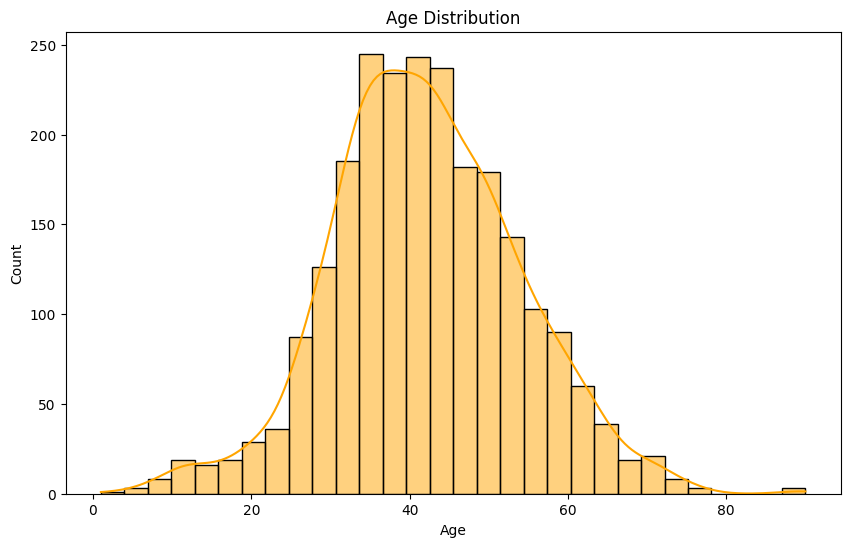

In [69]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'].dropna(), kde=True, bins=30, color='orange')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

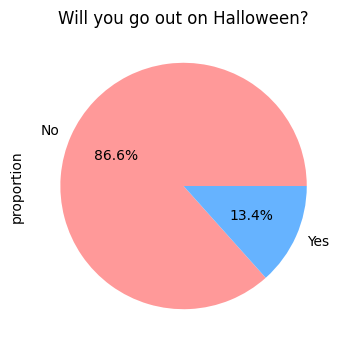

In [75]:
plt.figure(figsize=(6,4))
plot_df=df[df['going out?']!='Unknown']
plot_df['going out?'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Will you go out on Halloween?")
plt.show()

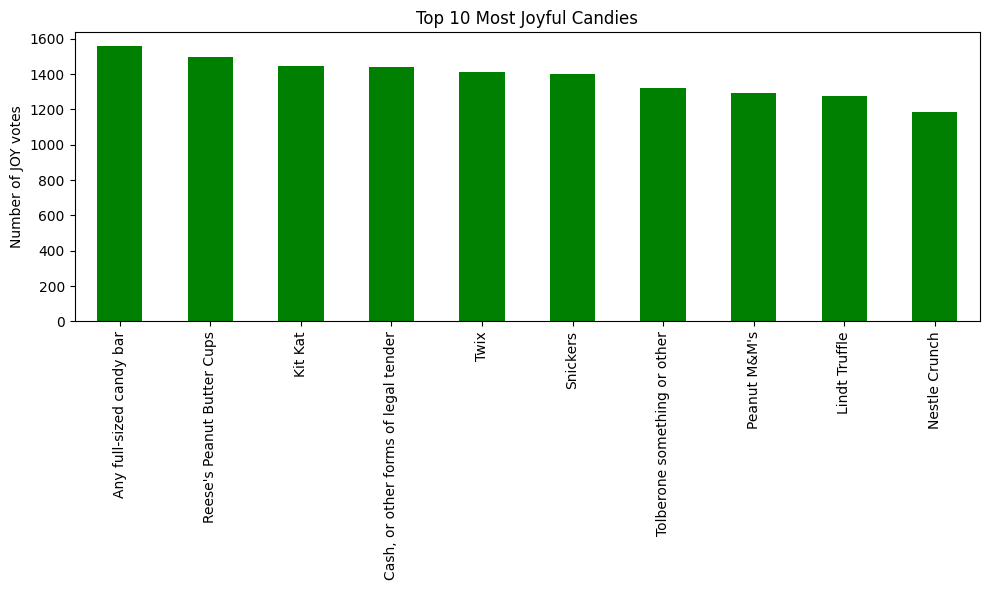

In [95]:
joy_counts = (df.iloc[:, 6:]).apply(lambda x: (x == "Joy").sum()).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
joy_counts.plot(kind='bar', color='green')
plt.title("Top 10 Most Joyful Candies")
plt.xticks(rotation=90)
plt.ylabel("Number of JOY votes")
plt.tight_layout()
plt.show()

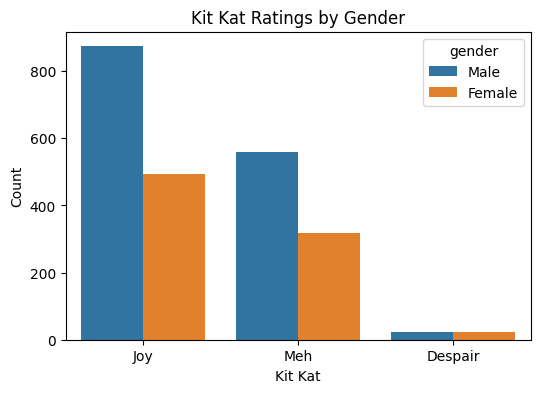

In [80]:
plt.figure(figsize=(6,4))
plot_df=df[df['gender']!="I'd rather not say"]
sns.countplot(data=plot_df, x='Kit Kat', hue='gender', order=["Joy", "Meh", "Despair"])
plt.title("Kit Kat Ratings by Gender")
plt.ylabel("Count")
plt.show()

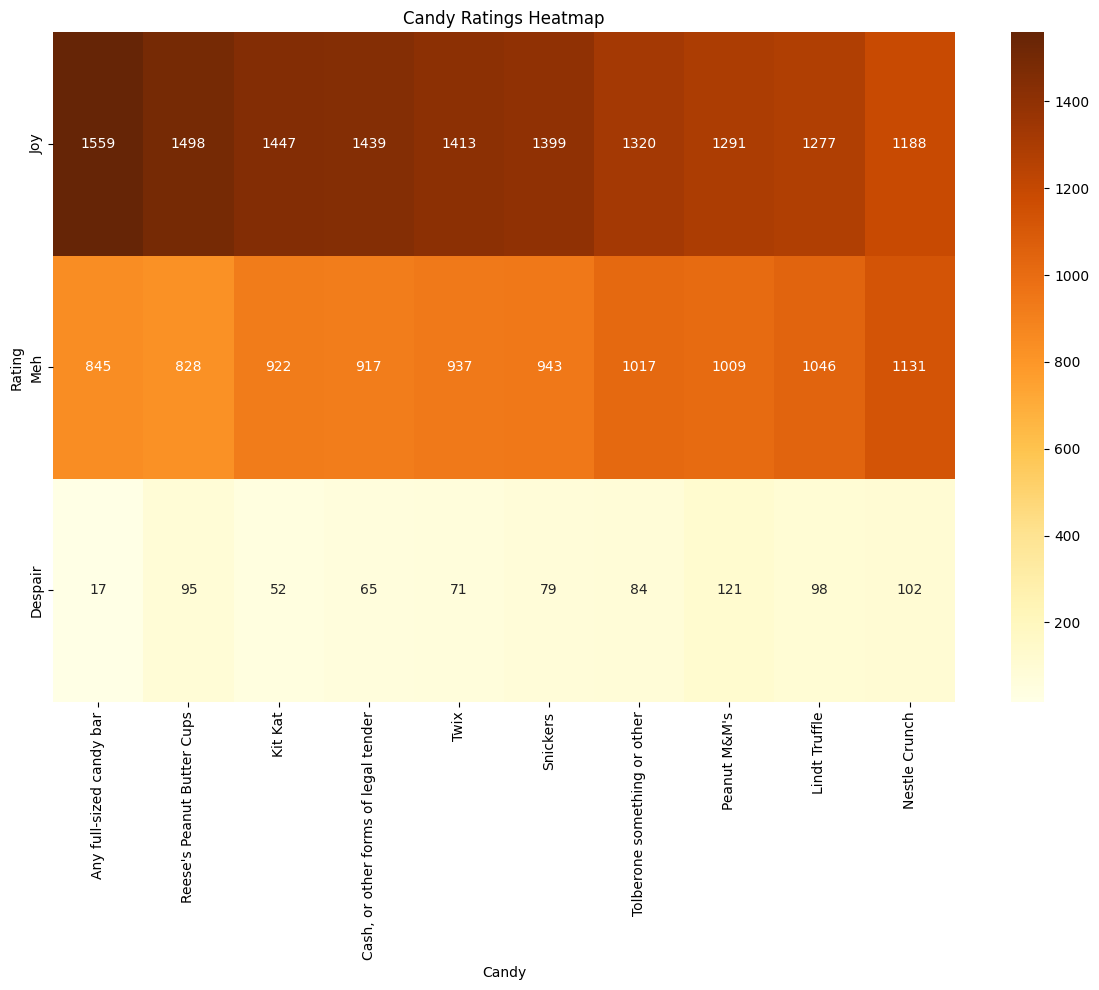

In [83]:
joy_data = (df.iloc[:,6:]).apply(lambda x: (x == "Joy").sum())
meh_data = (df.iloc[:,6:]).apply(lambda x: (x == "Meh").sum())
despair_data = (df.iloc[:,6:]).apply(lambda x: (x == "Despair").sum())

ratings_df = pd.DataFrame({
    "Joy": joy_data,
    "Meh": meh_data,
    "Despair": despair_data
}).sort_values(by="Joy", ascending=False).head(10)

plt.figure(figsize=(12,10))
sns.heatmap(ratings_df.T, cmap="YlOrBr", annot=True, fmt="d")
plt.title("Candy Ratings Heatmap")
plt.xlabel("Candy")
plt.ylabel("Rating")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

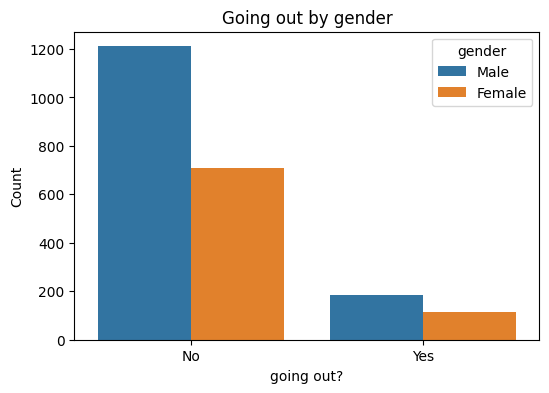

In [89]:
plt.figure(figsize=(6,4))
plot_df=df[(df['gender']!="I'd rather not say") & (df['going out?']!='Unknown')]
sns.countplot(data=plot_df, x='going out?', hue='gender')
plt.title("Going out by gender")
plt.ylabel("Count")
plt.show()

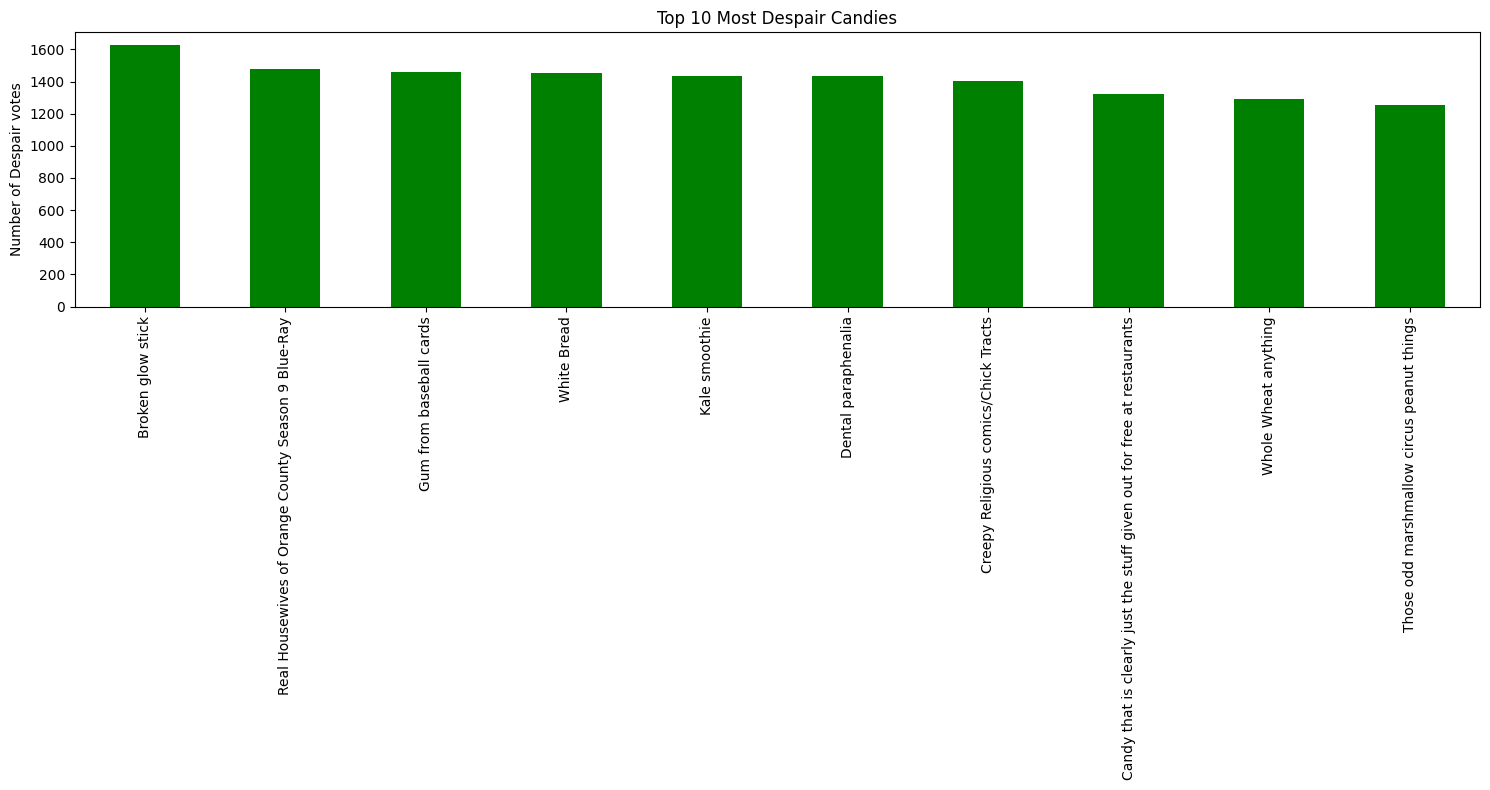

In [94]:
despair_counts = (df.iloc[:, 6:]).apply(lambda x: (x == "Despair").sum()).sort_values(ascending=False).head(10)

plt.figure(figsize=(15,8))
despair_counts.plot(kind='bar', color='green')
plt.title("Top 10 Most Despair Candies")
plt.xticks(rotation=90)
plt.ylabel("Number of Despair votes")
plt.tight_layout()
plt.show()

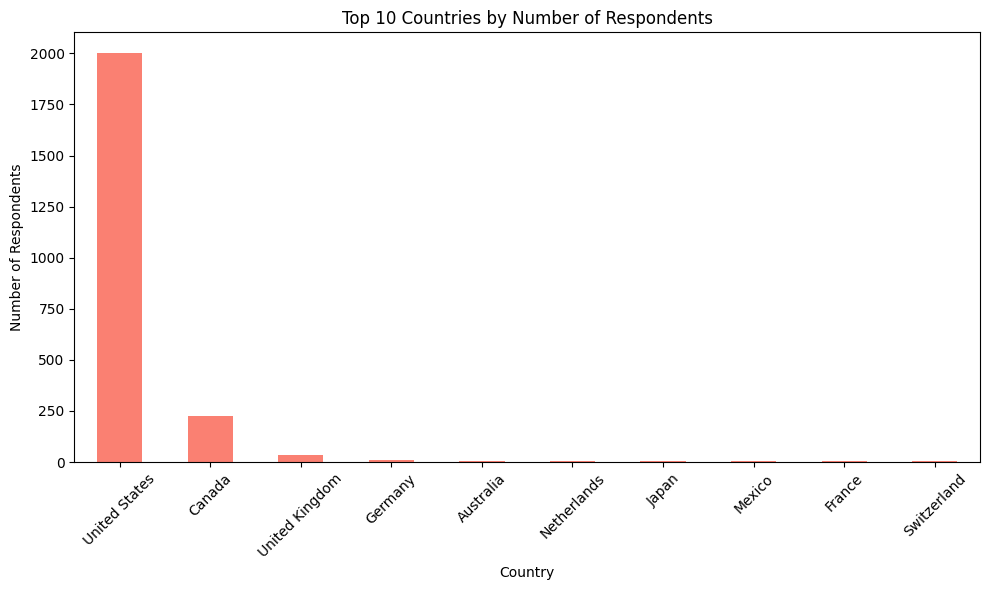

In [96]:
plt.figure(figsize=(10,6))
plot_df=df[df['country']!='Unknown']
plot_df['country'].value_counts().head(10).plot(kind='bar', color='salmon')

plt.title("Top 10 Countries by Number of Respondents")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

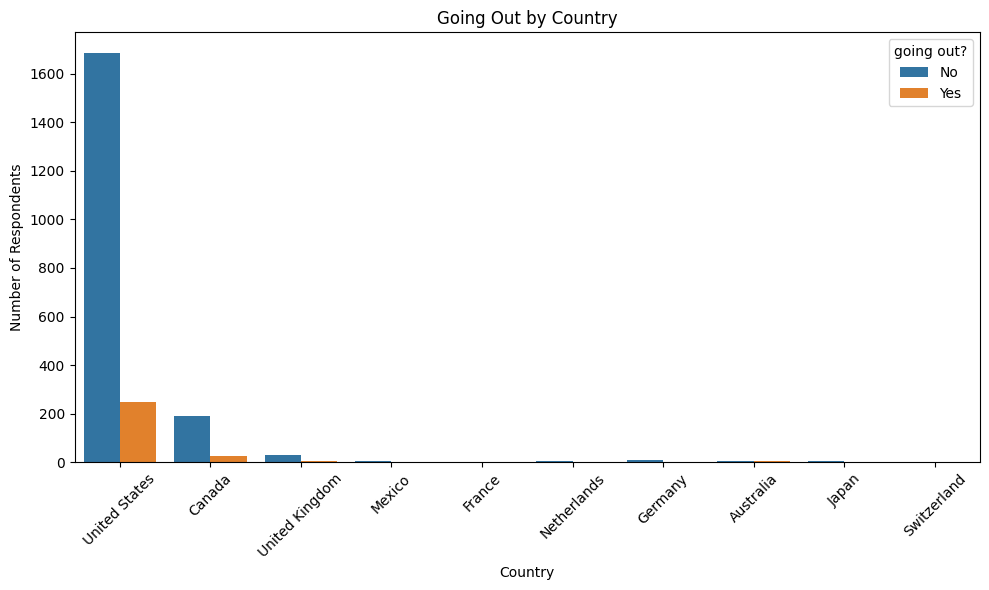

In [109]:
top_10_countries = df[df['country']!='Unknown']['country'].value_counts().head(10).index
plot_df=df[(df['country'].isin(top_10_countries)) & (df['going out?']!='Unknown')]
plt.figure(figsize=(10,6))
sns.countplot(data=plot_df, x='country', hue='going out?')
plt.title("Going Out by Country")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()